In [17]:
from ast import Return
from email import header
from operator import contains
from bs4 import BeautifulSoup
import requests
from csv import writer
from pprint import pprint
from re import search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
url= "https://id.indeed.com/jobs?q=data%20analyst&l=indonesia&from=searchOnHP&vjk=284ce6d382cca087"
page = requests.get(url)
print(page)

soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', class_="job_seen_beacon")
data = []

for page in range(1,21):
    with open ('loker.csv','w',encoding='utf8',newline='') as f:
        thewriter = writer(f)
        header =['Title', 'Company','Location','Fee']
        thewriter.writerow(header) 
        for list in lists:
            title = list.find('div', class_="heading4 color-text-primary singleLineTitle tapItem-gutter").text.replace('\n','')
            company = list.find('span', class_="companyName").text.replace('\n','')
            location = list.find('div', class_="companyLocation").text.replace('\n','')
            # baru = ['Baru']

            try:
                fee = list.select_one('div[class*="heading6 tapItem-gutter metadataContainer"]').get_text().split()[:]     
                if 'per' or 'bulan' in fee:
                    fee.remove('per') or fee.remove('bulan')
            except:
                fee = ''

            fee = "".join(fee)
            title = title.replace("Baru","")


            info = [title, company, location,fee]
            data.append(info)
            thewriter.writerow(info) 
            print(info)

<Response [200]>
['Data Analyst', 'PT Suntone Teknologi Internasional', 'Jakarta', 'Rp.5.000.000-Rp.6.500.000']
['Bussiness Analyst', 'PT. Makmur Jaya Sentosa', 'Surabaya', 'Rp.5.000.000-Rp.10.000.000']
['Junior Risk Analyst', 'GO-JEK', 'Jakarta', '']
['HR Data Analyst', 'GO-JEK', 'Jakarta', '']
['Data Analyst', 'PT MicroAd Indonesia', 'Jakarta', 'Rp.5.000.000']
['Supply and Inventory Planning Analyst', 'Cargill', 'Purwodadi+1 lokasi', '']
['Admin Data Analyst', 'SMC GROUP', 'Jakarta', 'Rp.5.500.000-Rp.6.800.000']
['Junior System Analyst', 'Inixindo Widya Iswara Nusantara', 'Yogyakarta', '']
['Data Analyst', "L'Oreal", 'Jakarta', '']
['business analyst', 'PT Singgasana Mulia Kencana', 'Surabaya', 'Rp.5.000.000-Rp.10.000.000']
['Data Analyst', 'PT Jembatan Akar Teknologi', 'Indonesia', '']
['Business Analyst', 'PT Trisila Jaya Sentosa', 'Surabaya', 'Rp.4.000.000-Rp.6.000.000']
['Data Analyst', 'KitaBeli', 'Jakarta', 'Rp.8.000.000']
['Data Analyst', 'DELOS Aqua', 'Jakarta', 'Rp.7.000.000

In [19]:
sample_df = pd.DataFrame(data = data, columns= ('Title','Company','Location','Fee'), index = np.arange(1,len(data)+1))
sample_df

,Title,Company,Location,Fee
1,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000
2,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
3,Junior Risk Analyst,GO-JEK,Jakarta,
4,HR Data Analyst,GO-JEK,Jakarta,
5,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000
...,...,...,...,...
296,Data Analyst,PT Jembatan Akar Teknologi,Indonesia,
297,Business Analyst,PT Trisila Jaya Sentosa,Surabaya,Rp.4.000.000-Rp.6.000.000
298,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000
299,Data Analyst,DELOS Aqua,Jakarta,Rp.7.000.000-Rp.20.000.000


In [20]:
sample_df.shape

(300, 4)

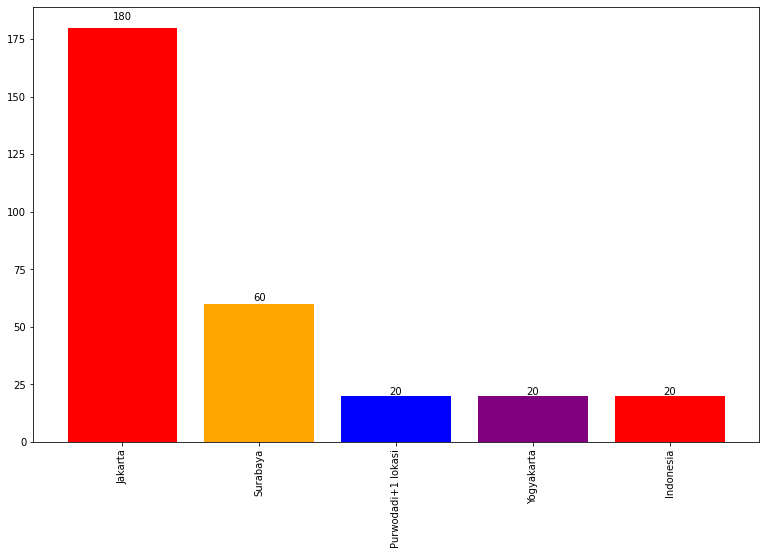

In [50]:
colors_list = ['Red','Orange', 'Blue', 'Purple']
ax = sample_df.Location.value_counts().plot(kind='bar', figsize=(13,8), width=0.8, color= colors_list, edgecolor=None)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

Jakarta               180
Surabaya               60
Purwodadi+1 lokasi     20
Yogyakarta             20
Indonesia              20
Name: Location, dtype: int64


<AxesSubplot:>

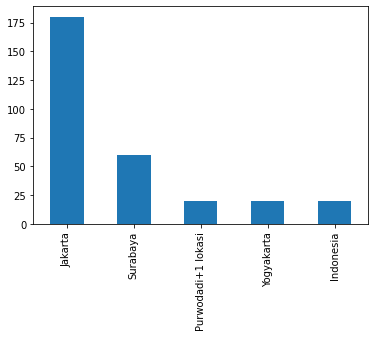

In [21]:
detail_location = sample_df.Location.value_counts()
print(detail_location)

sample_df.Location.value_counts().plot(kind = 'bar')

In [22]:
sample_df.loc[:,['Fee']]

,Fee
1,Rp.5.000.000-Rp.6.500.000
2,Rp.5.000.000-Rp.10.000.000
3,
4,
5,Rp.5.000.000
...,...
296,
297,Rp.4.000.000-Rp.6.000.000
298,Rp.8.000.000
299,Rp.7.000.000-Rp.20.000.000


In [23]:
df2 = sample_df.copy()    

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 300
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     300 non-null    object
 1   Company   300 non-null    object
 2   Location  300 non-null    object
 3   Fee       300 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB


In [25]:
df2['Fee'].replace('',np.nan,inplace=True)

In [26]:
df2.isnull().sum()

Title         0
Company       0
Location      0
Fee         140
dtype: int64

In [27]:
rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
rows_with_nan

[3,
 4,
 6,
 8,
 9,
 11,
 15,
 18,
 19,
 21,
 23,
 24,
 26,
 30,
 33,
 34,
 36,
 38,
 39,
 41,
 45,
 48,
 49,
 51,
 53,
 54,
 56,
 60,
 63,
 64,
 66,
 68,
 69,
 71,
 75,
 78,
 79,
 81,
 83,
 84,
 86,
 90,
 93,
 94,
 96,
 98,
 99,
 101,
 105,
 108,
 109,
 111,
 113,
 114,
 116,
 120,
 123,
 124,
 126,
 128,
 129,
 131,
 135,
 138,
 139,
 141,
 143,
 144,
 146,
 150,
 153,
 154,
 156,
 158,
 159,
 161,
 165,
 168,
 169,
 171,
 173,
 174,
 176,
 180,
 183,
 184,
 186,
 188,
 189,
 191,
 195,
 198,
 199,
 201,
 203,
 204,
 206,
 210,
 213,
 214,
 216,
 218,
 219,
 221,
 225,
 228,
 229,
 231,
 233,
 234,
 236,
 240,
 243,
 244,
 246,
 248,
 249,
 251,
 255,
 258,
 259,
 261,
 263,
 264,
 266,
 270,
 273,
 274,
 276,
 278,
 279,
 281,
 285,
 288,
 289,
 291,
 293,
 294,
 296,
 300]

In [28]:
df2[df2.Fee.isnull()].index.tolist()
print(len(df2[df2.Fee.isnull()].index.tolist()))

140


In [29]:
df2.dropna(axis=0,inplace=True)

In [30]:
df2

,Title,Company,Location,Fee
1,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000
2,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
5,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000
7,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000
10,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000
...,...,...,...,...
292,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000
295,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000
297,Business Analyst,PT Trisila Jaya Sentosa,Surabaya,Rp.4.000.000-Rp.6.000.000
298,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000


In [31]:
juta=[]
for x in df2['Fee']:
    fee_juta = x[:][3:6]
    juta.append(fee_juta)

df2['Fee(juta)'] = juta
df2

,Title,Company,Location,Fee,Fee(juta)
1,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000,5.0
2,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
5,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000,5.0
7,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000,5.5
10,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
...,...,...,...,...,...
292,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000,5.5
295,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
297,Business Analyst,PT Trisila Jaya Sentosa,Surabaya,Rp.4.000.000-Rp.6.000.000,4.0
298,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000,8.0


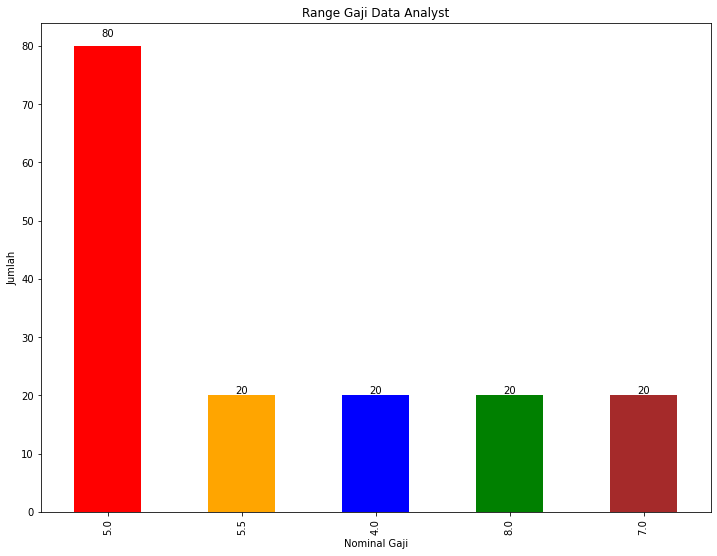

In [58]:
colors_list =['red','orange','blue','green','brown']
ax = df2['Fee(juta)'].value_counts(ascending=False).plot(kind='bar', figsize=(12,9), color=colors_list,
    title='Range Gaji Data Analyst', xlabel ='Nominal Gaji', ylabel ='Jumlah')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.annotate (f'{height}', (x+width/2, y+height*1.02), ha='center') 